# SPRAWOZDANIE

*system operacyjny: Linux Ubuntu 22.04.4 LTS*  
*Intel® Core™ i7-7500U CPU @ 2.70GHz × 4*   
*RAM 16 Gb*

Illia Yanukovich  
Olgierd Ludwiczak

## KONFIGURACJA

In [1]:
import os
import utils
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

TEST_SIZES = [1000, 10000, 19000, 28000, 37000, 46000, 55000, 64000, 73000, 82000, 91000, 100000, 109000, 118000, 127000]
TYPE_STRINGS = ['A', 'V', 'Inc', 'Dec', 'Rand']
MAX_NUM = 1000000
NUM_PER_SIZE = 10                                
SOURCES = 'sources'
BINS = 'bins'
TESTS = 'tests'
RESULTS = 'results'
TIMES = 'times'
VERBOSE = False

## TWORZENIE TESTÓW

In [2]:
utils.create_tests(TESTS, TEST_SIZES, NUM_PER_SIZE, MAX_NUM)

## KOMPILACJA

In [3]:
utils.compile_sources(SOURCES, BINS, v=True)

Executing: g++ sources/HeapSort.cpp -o bins/HeapSort


Executing: gcc sources/MergeSort.c -o bins/MergeSort


Executing: gcc sources/QuickSortIter.c -o bins/QuickSortIter


Executing: gcc sources/QuickSortRec.c -o bins/QuickSortRec


Executing: g++ sources/ShellSort.cpp -o bins/ShellSort


## URUCHOMIENIE

In [4]:
for algo in os.listdir(BINS):
    for ts in TEST_SIZES:
        for tn in range(NUM_PER_SIZE):
            for string in TYPE_STRINGS:
                utils.run_algo(BINS, TESTS, RESULTS, TIMES, ts, tn, algo, string, v=VERBOSE)

## WYKRESY

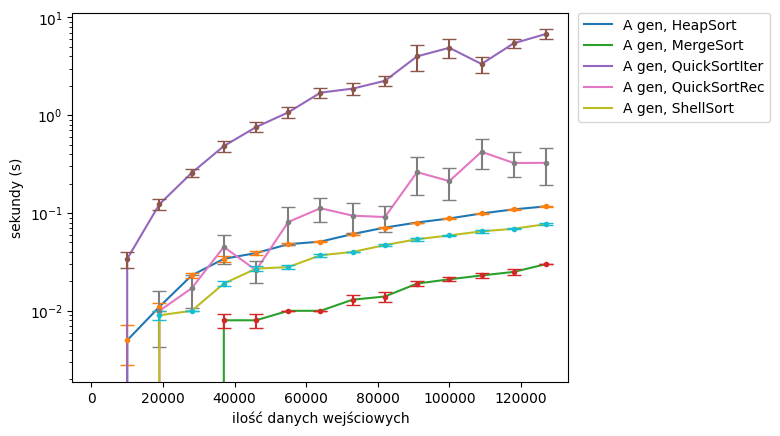

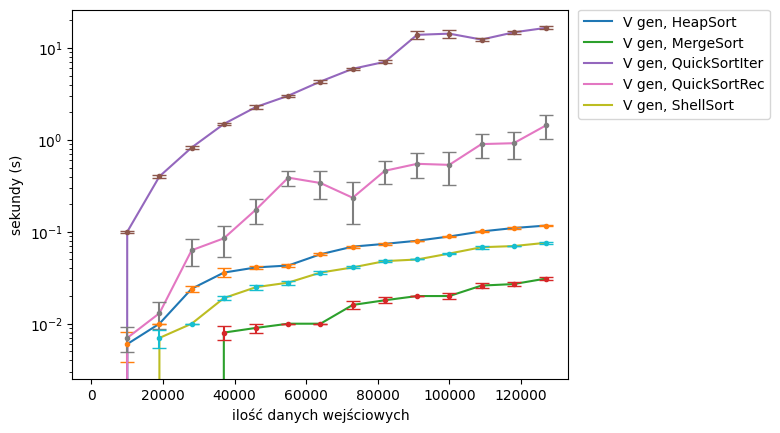

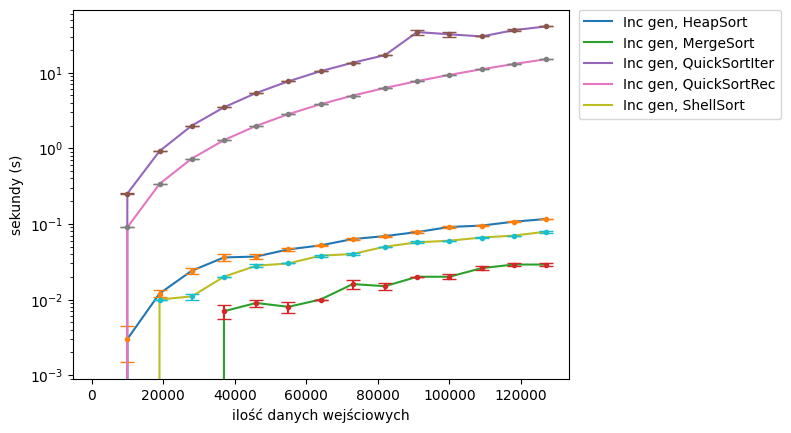

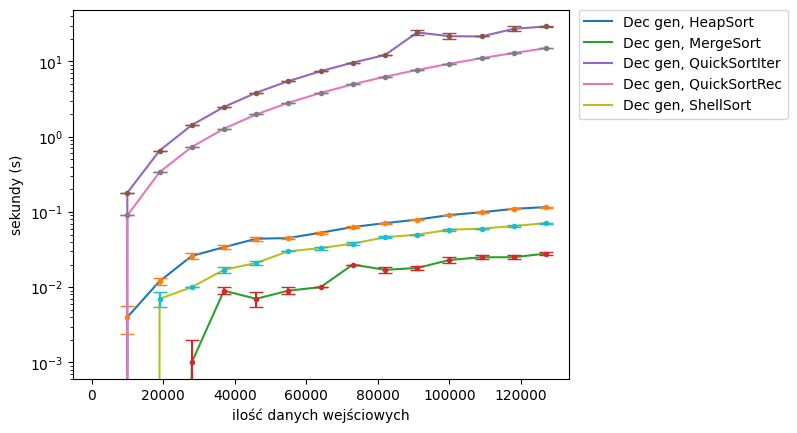

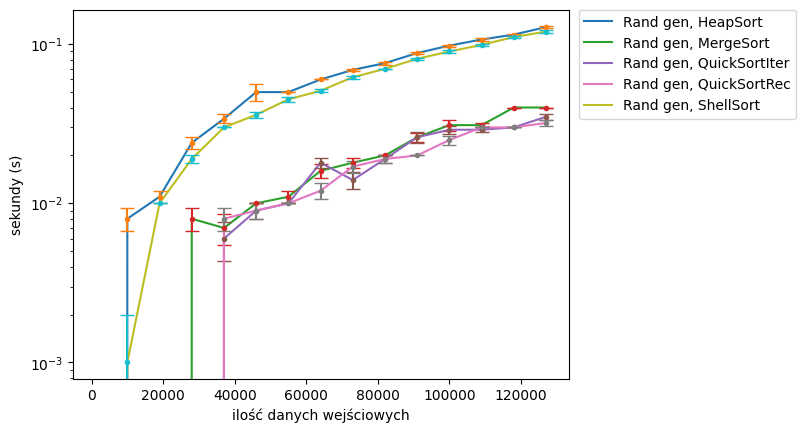

In [5]:
times = utils.times_algo_from_dane(TIMES)
utils.plot_string_algo(TYPE_STRINGS, times)

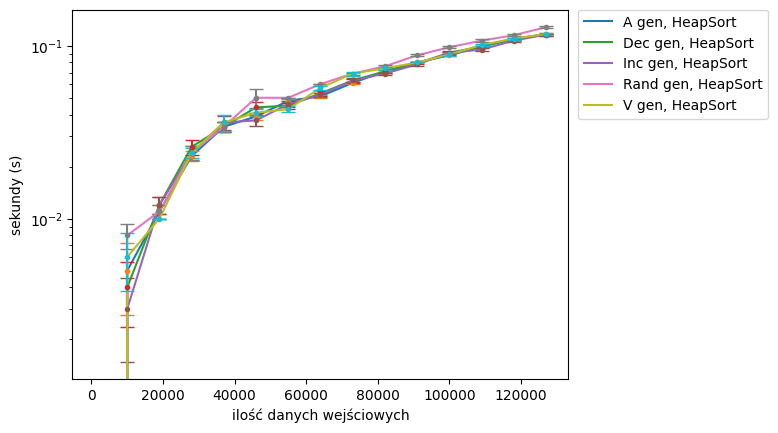

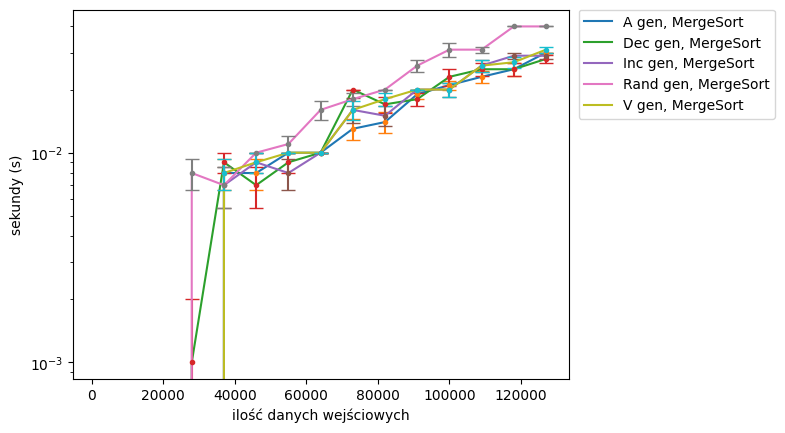

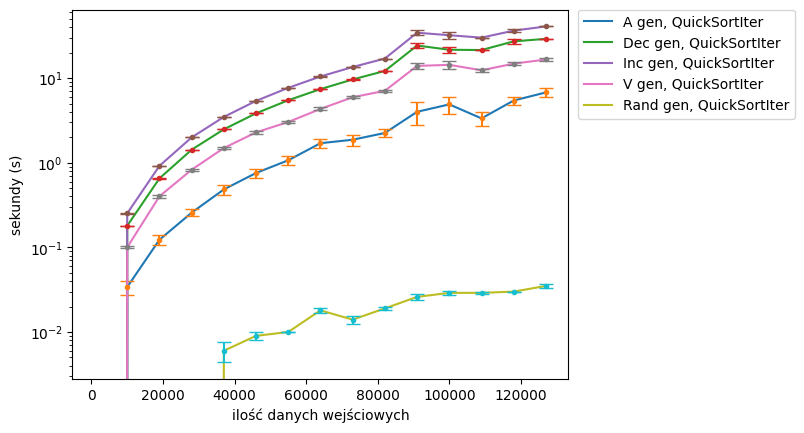

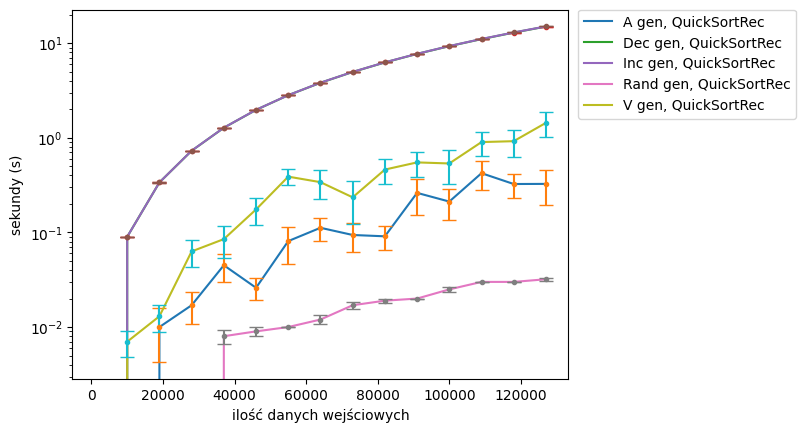

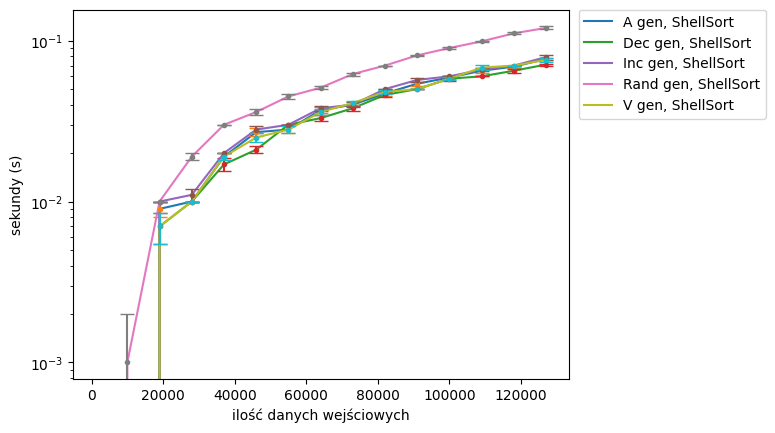

In [6]:
times = utils.times_algo_from_dane(TIMES)
utils.plot_algo_size(times)

## ZŁOŻONOSCI OBLICZENIOWE

**Shell Sort:**

Optymistyczny: $O(n*log_{2}(n))$

Średni: $O(n^{1.25})$

Pesymistyczny: $O(n^{1.5})$

*Shell sort zawsze wykonuje tylko kilka interacji pętli z przyrostami (Hibbard Gap). Kiedy dane są posortowane, przynajmniej częściowo (ułożone w jakimś porządku), shell sort jest skuteczny już przy wysokich przyrostach, co oznacza, że insertion sort wykonuje mniej operacji przy niskich wartościach przerwy. Przypadekiem najbardziej optymistycznym są tutaj dane malejące. Jednak również w przypadku innych sekwencji, które mają jakiś porządek, liczba zamian które insertion sort musi wykonać jest ograniczona - dane są już częściowo posortowane, często nie ma koniecznosci wielu zamian na jednym miejscu. Na wykresie widać, że czas wykonania dla takich sekwencji rośnie odpowiednio powoli. Natomiast kiedy sposób ułożenia danych nie sprzyja wybranej wartości przyrostu, złożoność będzie odpowiednio wyższa. Widać to na danych losowych.*

**Merge Sort:**

Optymistyczny: $O(n*log_{2}(n))$

Średni: $O(n*log_{2}(n))$

Pesymistyczny: $O(n*log_{2}(n))$

*Złożoność MergeSorta jest matematycznie taka sama dla każdego przypadku. Dzielenie danych ma złożoność logarytmiczną (wysokość drzewa), łączenie ich z powrotem wykonuje się w czasie liniowym. Na wykresach widać, że merge sort ma podobny czas wykonania dla różnych rodzajów danych, z drobnym spadkiem wydajności w przypadku danych losowych.*

**Heap Sort:**

Optymistyczny: $O(n*log_{2}(n))$

Średni: $O(n*log_{2}(n))$

Pesymistyczny: $O(n*log_{2}(n))$

*To samo tyczy się HeapSorta, złożoność jest podobna dla różnych przypadków (co oddzwierciedlają wykresy). n/2 razy trzeba wywołać hepify, a złożoność heapify zależy od wysokości drzewa binarnego, zatem jest logarytmiczna. Wykresy HeapSorta prawie się pokrywają.*

**Quick Sort:**

Optymistyczny: $O(n*log_{2}(n))$

Średni: $O(n*log_{2}(n))$

Pesymistyczny: $O(n^{2})$

*Quicksort działa najlepiej, gdy pivot jest bliski medianie liczb (tablica jest dzielona na połowy, ergo wysokość drzewa, a zatem liczba operacji, jest niska). Zatem zarówno dane rosnące i malejące, jak i V i A kształtne są dosyć negatywnymi przypadkami, kiedy pivotem jest liczba najbardziej po prawej. Przypadkiem średnim lub optymistycznym będą tutaj dane losowe. Widać to bardzo dobrze na wykresach. Zarówno wariant rekurencyjny, jak i iteracyjny jest dla danych generowanych losowo wielokrotnie wydajniejszy. Widoczna jest również przewaga w wydajności przy ciągu A-kształtnym. W takim ciągu pivot wybierany jest z przedziału <0, max ciągu> (już w ciągu V-kształtnym pivot należy do przedziału <min ciągu, max zakresu wartości>, a w ciągach malejących i rosnących sam stanowi odpowiednio min i max ciągu). Wykresy odzwierciedlają te zależności.*
